In [1]:
import sys
sys.path.insert(0,'/home/forrest/MSU/research/code/athenaPK/yt/yt/')

import numpy as np
import scipy as sp
import scipy.interpolate
import scipy.integrate
import glob
import yt
import distutils.util

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt

In [3]:
mpl.rcParams["figure.facecolor"]="white"

In [1]:
#import Athena parameter file reading
import sys
sys.path.insert(0, '/home/forrest/MSU/research/code/athena-public-version/vis/python')
import athena_read

# Load the input file

In [5]:
params = athena_read.athinput(
    "/home/forrest/MSU/research/code/athenaPK/inputs/cluster/hydro_agn_feedback.in")

data_dir="/home/forrest/MSU/research/code/athenaPK/build-vscode/tst/regression/outputs/cluster_hydro_agn_feedback/"
testname = "thermal_only_precessed_False"


# Plot slices

In [6]:


out_idx = 0

filename = f"{data_dir}/parthenon.{testname}.{out_idx:05d}.phdf"

ds0 = yt.load(filename)#,units_override=units_override)

out_idx = 1

filename = f"{data_dir}/parthenon.{testname}.{out_idx:05d}.phdf"

ds = yt.load(filename)#,units_override=units_override)

yt : [WARNING  ] 2021-06-23 15:19:54,798 Assuming 1.0 = 1.0 K
yt : [INFO     ] 2021-06-23 15:19:54,856 Parameters: current_time              = 0.0
yt : [INFO     ] 2021-06-23 15:19:54,856 Parameters: domain_dimensions         = [64 64 64]
yt : [INFO     ] 2021-06-23 15:19:54,857 Parameters: domain_left_edge          = [-0.1 -0.1 -0.1]
yt : [INFO     ] 2021-06-23 15:19:54,857 Parameters: domain_right_edge         = [0.1 0.1 0.1]
yt : [INFO     ] 2021-06-23 15:19:54,857 Parameters: cosmological_simulation   = 0.0
yt : [WARNING  ] 2021-06-23 15:19:54,873 Assuming 1.0 = 1.0 K
yt : [INFO     ] 2021-06-23 15:19:54,934 Parameters: current_time              = 0.01
yt : [INFO     ] 2021-06-23 15:19:54,935 Parameters: domain_dimensions         = [64 64 64]
yt : [INFO     ] 2021-06-23 15:19:54,935 Parameters: domain_left_edge          = [-0.1 -0.1 -0.1]
yt : [INFO     ] 2021-06-23 15:19:54,936 Parameters: domain_right_edge         = [0.1 0.1 0.1]
yt : [INFO     ] 2021-06-23 15:19:54,937 Parameter

yt : [INFO     ] 2021-06-23 15:19:55,856 xlim = -0.100000 0.100000
yt : [INFO     ] 2021-06-23 15:19:55,857 ylim = -0.100000 0.100000
yt : [INFO     ] 2021-06-23 15:19:55,857 xlim = -0.100000 0.100000
yt : [INFO     ] 2021-06-23 15:19:55,858 ylim = -0.100000 0.100000
yt : [INFO     ] 2021-06-23 15:19:55,859 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800
yt : [INFO     ] 2021-06-23 15:19:55,904 Making a fixed resolution buffer of (('gas', 'temperature')) 800 by 800
yt : [INFO     ] 2021-06-23 15:19:55,924 Making a fixed resolution buffer of (('gas', 'mach_number')) 800 by 800
yt : [WARNING  ] 2021-06-23 15:19:56,243 Plot image for field ('gas', 'mach_number') has zero dynamic range. Min = Max = 0.000000.
yt : [WARNING  ] 2021-06-23 15:19:56,243 Switching to linear colorbar scaling.
yt : [INFO     ] 2021-06-23 15:19:56,551 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800
yt : [INFO     ] 2021-06-23 15:19:56,568 Making a fixed resolution buffer of (


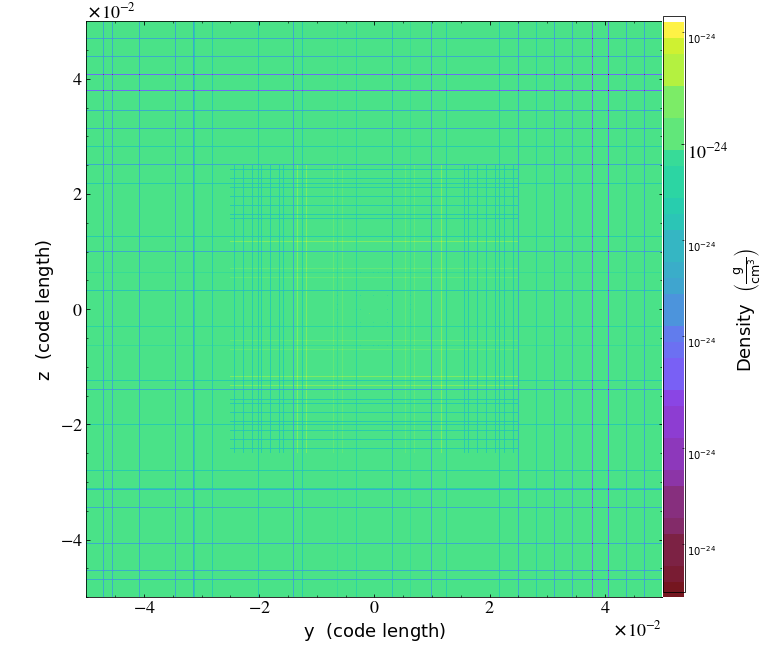
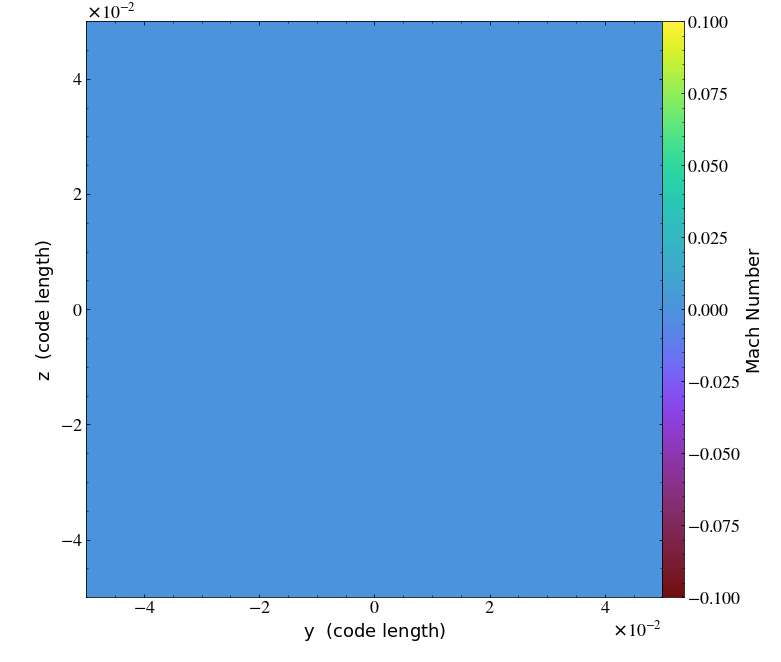
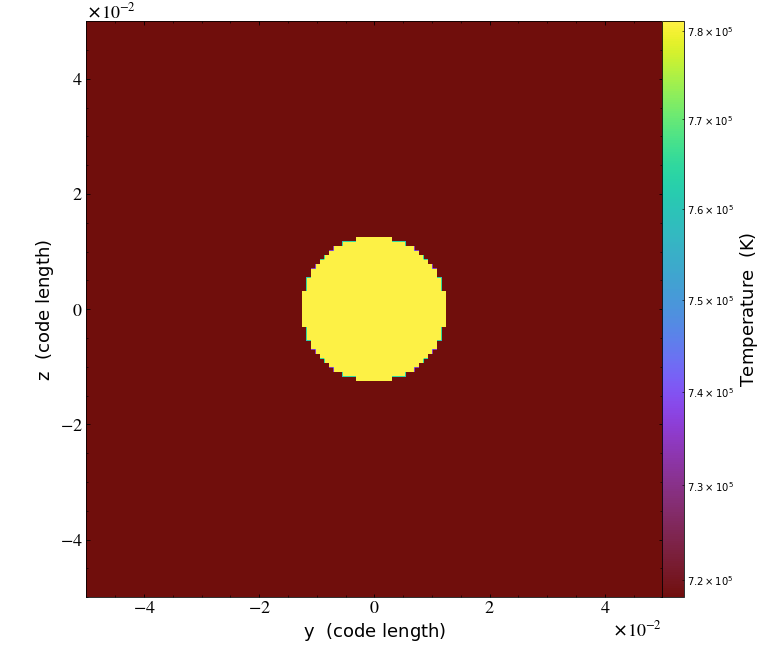

In [8]:
fields = ["density","mach_number","temperature"]
field_units = {"density":"g/cm**3","temperature":"K"}


slc = yt.SlicePlot(ds,"x",fields,center=(0,0,0))
slc.set_width((100,"kpc"))

for field,unit in field_units.items():
    slc.set_unit(field,unit)

slc.show()

In [9]:
agn_power = ds.quan(params["problem/cluster"]["agn_power"],"code_length**2*code_mass/code_time**3")
agn_thermal_radius = ds.quan(params["problem/cluster"]["agn_thermal_radius"],"code_length")

thermal_feedback_rate = agn_power/(4/3.*np.pi*agn_thermal_radius**3)

tlim = ds.quan(params["parthenon/time"]["tlim"],"code_time")
print(thermal_feedback_rate)
print(thermal_feedback_rate*tlim)

20.29013539204792 code_mass/(code_length*code_time**3)
0.2029013539204792 code_mass/(code_length*code_time**2)


In [10]:
ad = ds.all_data()
ad0 = ds0.all_data()

In [11]:
ad["TotalEnergyDensity"].min()

unyt_quantity(2.31815526, '(dimensionless)')

In [12]:
ad["thermal_energy"].max()

yt : [WARNING  ] 2021-06-23 15:19:58,372 The Derived Field ('gas', 'thermal_energy') is deprecated as of yt v4.0.0 and will be removed in yt v4.1.0. Use ('gas', 'specific_thermal_energy') instead.


unyt_quantity(0.01706232, 'code_length**2/code_time**2')

In [16]:
dE = ad["TotalEnergyDensity"]-ad0["TotalEnergyDensity"]

In [17]:
ad0["TotalEnergyDensity"].max()

unyt_quantity(2.31815526, '(dimensionless)')

In [18]:
dE.max()

unyt_quantity(0.20290135, '(dimensionless)')